In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ph-recognition/ph-data.csv


In [2]:
def precision_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    
    for i in range(0,len(class_id)):
        if TP[i]==0 or FP[i]==0:
            TP[i]=0.00000000001
            FP[i]=0.00000000001
        sonuc+=(TP[i]/(TP[i]+FP[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc

def recall_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=(TP[i]/(TP[i]+FN[i]))
       
    sonuc=sonuc/len(class_id)
    return sonuc
def accuracy_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=((TP[i]+TN[i])/(TP[i]+FP[i]+TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def specificity_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=(TN[i]/(FP[i]+TN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def NPV_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=(TN[i]/(TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN
def yenimetot(y_test,y_score):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    y_score = label_binarize(y_score, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    n_classes = 15
    fpr = dict()
    tpr = dict()
    thr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], thr[i] = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return roc_auc[14],fpr[14],tpr[14],thr[14]

In [3]:
df=pd.read_csv("../input/ph-recognition/ph-data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
blue     653 non-null int64
green    653 non-null int64
red      653 non-null int64
label    653 non-null int64
dtypes: int64(4)
memory usage: 20.5 KB


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [7]:
y=df.label.values
x_data=df.iloc[:,0:3]

In [8]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
df.label.value_counts()

14    44
12    44
11    44
10    44
9     44
8     44
7     44
6     44
5     44
4     44
3     44
2     44
1     44
13    43
0     38
Name: label, dtype: int64

In [10]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
score_liste=[]
auc_scor=[]
precision_scor=[]
recall_scor=[]
f1_scor=[]
LR_plus=[]
LR_eksi=[]
odd_scor=[]
NPV_scor=[]
youden_scor=[]
specificity_scor=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

KNN Algoritması başarım sonucu:  0.7551020408163265


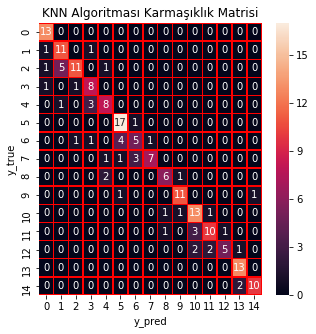

KNN algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.65      0.85      0.73        13
           2       0.85      0.61      0.71        18
           3       0.62      0.80      0.70        10
           4       0.67      0.67      0.67        12
           5       0.74      0.94      0.83        18
           6       0.56      0.42      0.48        12
           7       0.88      0.58      0.70        12
           8       0.75      0.67      0.71         9
           9       0.85      0.85      0.85        13
          10       0.72      0.81      0.76        16
          11       0.77      0.67      0.71        15
          12       0.83      0.50      0.62        10
          13       0.81      1.00      0.90        13
          14       0.91      0.83      0.87        12

    accuracy                           0.76       196
   macro avg       0.76      0.75  

In [11]:
k=3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
y_head=knn.predict(x_test)
print("KNN Algoritması başarım sonucu: ",knn.score(x_test,y_test))

from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Algoritması Karmaşıklık Matrisi")
plt.show()
knnauc,knn_fpr,knn_tpr,knn_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(knnauc)
#knn_fpr,knn_tpr,knn_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))

LR_plus.append((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))
LR_eksi.append(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp)))
odd_scor.append(((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))/(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp))))
youden_scor.append((recall_hesapla(classid,tn,fp,fn,tp)+specificity_hesapla(classid,tn,fp,fn,tp)-1))
print("KNN algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

Karar Ağaçları Algoritması için başarım sonucu:  0.7653061224489796
DTC algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.92      0.89        13
           2       0.92      0.61      0.73        18
           3       0.54      0.70      0.61        10
           4       0.69      0.75      0.72        12
           5       0.65      0.83      0.73        18
           6       0.71      0.42      0.53        12
           7       0.56      0.75      0.64        12
           8       0.86      0.67      0.75         9
           9       0.73      0.85      0.79        13
          10       0.81      0.81      0.81        16
          11       0.79      0.73      0.76        15
          12       0.86      0.60      0.71        10
          13       0.81      1.00      0.90        13
          14       1.00      0.83      0.91        12

    accuracy         

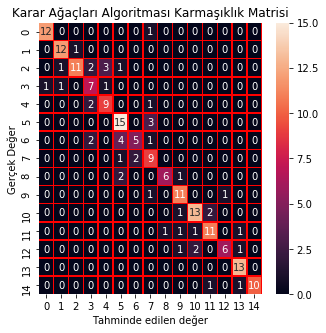

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_head=dtc.predict(x_test)
print("Karar Ağaçları Algoritması için başarım sonucu: ",dtc.score(x_test,y_test))
dtcauc,dtc_fpr,dtc_tpr,dtc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(dtcauc)
#dtc_fpr,dtc_tpr,dtc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)

print("DTC algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmdtc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahminde edilen değer")
plt.ylabel("Gerçek Değer")
plt.title("Karar Ağaçları Algoritması Karmaşıklık Matrisi")
plt.show()

Rastgele Orman Algoritması başarım sonucu:  0.7755102040816326
Rastgele Orman algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.71      0.92      0.80        13
           2       0.92      0.67      0.77        18
           3       0.54      0.70      0.61        10
           4       0.89      0.67      0.76        12
           5       0.64      0.89      0.74        18
           6       0.56      0.42      0.48        12
           7       0.82      0.75      0.78        12
           8       0.75      0.67      0.71         9
           9       0.85      0.85      0.85        13
          10       0.81      0.81      0.81        16
          11       0.85      0.73      0.79        15
          12       0.88      0.70      0.78        10
          13       0.76      1.00      0.87        13
          14       1.00      0.83      0.91        12

    accuracy   

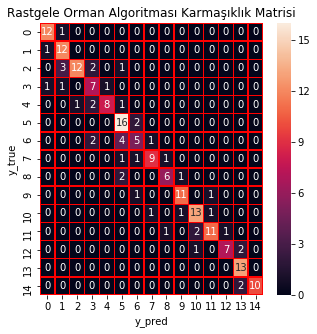

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=225,random_state=1)
rfc.fit(x_train,y_train)
y_head=rfc.predict(x_test)
print("Rastgele Orman Algoritması başarım sonucu: ",rfc.score(x_test,y_test))
rfcauc,rfc_fpr,rfc_tpr,rfc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(rfcauc)
#rfc_fpr,rfc_tpr,rfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Rastgele Orman algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmrfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmrfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Rastgele Orman Algoritması Karmaşıklık Matrisi")
plt.show()


Naive Bayes Algoritması başarım sonucu:  0.5153061224489796
Naive Bayes algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.67      0.62      0.64        13
           2       0.50      0.06      0.10        18
           3       0.25      0.70      0.37        10
           4       0.44      0.33      0.38        12
           5       0.42      0.28      0.33        18
           6       0.30      0.58      0.40        12
           7       0.75      0.25      0.38        12
           8       0.43      0.67      0.52         9
           9       0.85      0.85      0.85        13
          10       0.87      0.81      0.84        16
          11       0.62      0.33      0.43        15
          12       0.27      0.60      0.37        10
          13       0.40      0.15      0.22        13
          14       0.79      0.92      0.85        12

    accuracy         

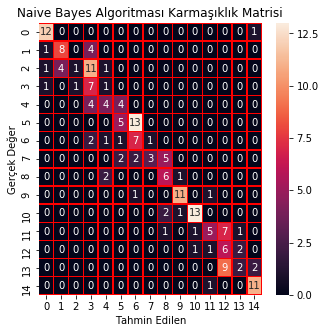

In [14]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_head=nb.predict(x_test)
print("Naive Bayes Algoritması başarım sonucu: ",nb.score(x_test,y_test))

nbauc,nb_fpr,nb_tpr,nb_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(nbauc)
#nb_fpr,nb_tpr,nb_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Naive Bayes algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmnb = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmnb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Naive Bayes Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regresyon Algoritması başarım sonucu:  0.46938775510204084
Lojistik Regresyon algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.67      0.92      0.77        13
           2       0.00      0.00      0.00        18
           3       0.29      0.80      0.42        10
           4       0.41      0.58      0.48        12
           5       0.00      0.00      0.00        18
           6       0.12      0.17      0.14        12
           7       0.58      0.58      0.58        12
           8       0.46      0.67      0.55         9
           9       0.55      0.85      0.67        13
          10       0.89      0.50      0.64        16
          11       0.00      0.00      0.00        15
          12       0.26      0.80      0.39        10
          13       0.00      0.00      0.00        13
          14       0.61      0.92      0.73        12

    ac

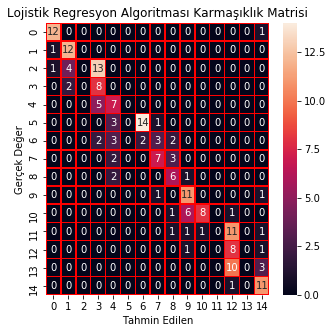

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_head=lr.predict(x_test)
print("Logistic Regresyon Algoritması başarım sonucu: ",lr.score(x_test,y_test))

lrcauc,lrc_fpr,lrc_tpr,lrc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(lrcauc)
#lrc_fpr,lrc_tpr,lrc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Lojistik Regresyon algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmlr = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmlr,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Lojistik Regresyon Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Destek Vektör Makineleri Algoritması başarım sonucu:  0.336734693877551
Destek Vektör Makineleri algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.39      1.00      0.57        13
           2       0.00      0.00      0.00        18
           3       0.28      0.80      0.41        10
           4       0.29      0.33      0.31        12
           5       0.00      0.00      0.00        18
           6       0.06      0.08      0.07        12
           7       0.44      0.33      0.38        12
           8       0.46      0.67      0.55         9
           9       0.39      0.85      0.54        13
          10       1.00      0.06      0.12        16
          11       1.00      0.07      0.12        15
          12       0.21      0.80      0.33        10
          13       0.00      0.00      0.00        13
          14       0.70      0.58      0.64        

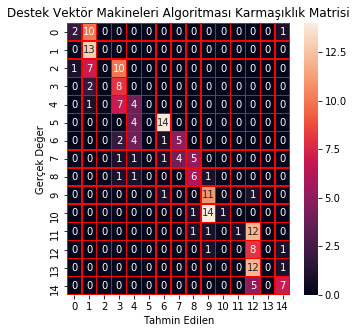

In [16]:
from sklearn.svm import SVC
svc=SVC(random_state=1)
svc.fit(x_train,y_train)
y_head=svc.predict(x_test)
print("Destek Vektör Makineleri Algoritması başarım sonucu: ",svc.score(x_test,y_test))

svcauc,svc_fpr,svc_tpr,svc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(svcauc)
#svc_fpr,svc_tpr,svc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Destek Vektör Makineleri algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmsvc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmsvc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Destek Vektör Makineleri Algoritması Karmaşıklık Matrisi")
plt.show()

Gradient Boosting Classifier Algoritması başarım sonucu:  0.7857142857142857
Gradient Boosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.76      1.00      0.87        13
           2       0.76      0.72      0.74        18
           3       0.54      0.70      0.61        10
           4       0.89      0.67      0.76        12
           5       0.74      0.94      0.83        18
           6       0.55      0.50      0.52        12
           7       1.00      0.58      0.74        12
           8       0.67      0.67      0.67         9
           9       0.79      0.85      0.81        13
          10       0.81      0.81      0.81        16
          11       0.73      0.73      0.73        15
          12       0.88      0.70      0.78        10
          13       0.93      1.00      0.96        13
          14       1.00      0.92      0.9

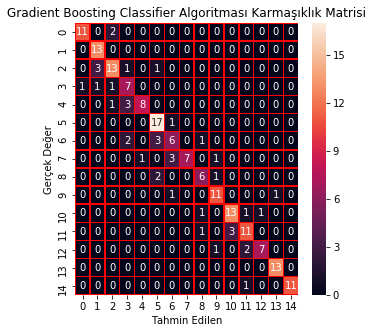

In [17]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(x_train,y_train)
y_head=gfc.predict(x_test)
print("Gradient Boosting Classifier Algoritması başarım sonucu: ",gfc.score(x_test,y_test))
gfcauc,gfc_fpr,gfc_tpr,gfc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(gfcauc)
#gfc_fpr,gfc_tpr,gfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Gradient Boosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmgfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmgfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Gradient Boosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

AdaBoosting Classifier Algoritması başarım sonucu:  0.27040816326530615
AdaBoosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.75      0.92      0.83        13
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        10
           4       0.23      1.00      0.38        12
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        12
           7       0.37      0.83      0.51        12
           8       0.01      0.11      0.03         9
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        13
          14       0.67      0.50      0.57        12

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


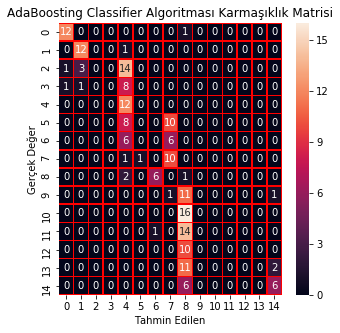

In [18]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train,y_train)
y_head=abc.predict(x_test)
print("AdaBoosting Classifier Algoritması başarım sonucu: ",abc.score(x_test,y_test))

abcauc,abc_fpr,abc_tpr,abc_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(abcauc)
#abc_fpr,abc_tpr,abc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("AdaBoosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmabc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmabc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("AdaBoosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

Yapay Sinir Ağları Algoritması başarım sonucu:  0.5408163265306123
Yapay Sinir Ağları algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.68      1.00      0.81        13
           2       0.75      0.17      0.27        18
           3       0.35      0.80      0.48        10
           4       0.62      0.67      0.64        12
           5       0.00      0.00      0.00        18
           6       0.14      0.25      0.18        12
           7       0.59      0.83      0.69        12
           8       0.75      0.67      0.71         9
           9       0.69      0.85      0.76        13
          10       0.77      0.62      0.69        16
          11       0.80      0.27      0.40        15
          12       0.30      0.70      0.42        10
          13       0.00      0.00      0.00        13
          14       0.55      0.92      0.69        12

    acc

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


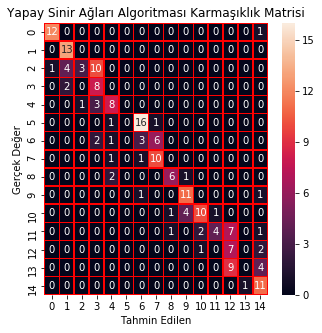

In [19]:
ysa=MLPClassifier(alpha=1, max_iter=1000)
ysa.fit(x_train,y_train)
y_head=ysa.predict(x_test)
print("Yapay Sinir Ağları Algoritması başarım sonucu: ",ysa.score(x_test,y_test))

ysaauc,ysa_fpr,ysa_tpr,ysa_trr=yenimetot(y_test,y_head)
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(ysaauc)
#ysa_fpr,ysa_tpr,ysa_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Yapay Sinir Ağları algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmysa = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmysa,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Yapay Sinir Ağları Algoritması Karmaşıklık Matrisi")
plt.show()


In [20]:
algo_liste=["KNN","Decision Tree","Random Forest","Naive Bayes","Linear Regression","Support Vector Machine","Gradient Boosting Classifier","AdaBoosting Classifier","Neural Network"]
score={"algo_list":algo_liste,"score_liste":score_liste,"precision":precision_scor,"recall":recall_scor,"f1_score":f1_scor,"AUC":auc_scor,"LR+":LR_plus,"LR-":LR_eksi,"ODD":odd_scor,"YOUDEN":youden_scor,"Specificity":specificity_scor}

In [21]:
df=pd.DataFrame(score)
df

,algo_list,score_liste,precision,recall,f1_score,AUC,LR+,LR-,ODD,YOUDEN,Specificity
0,KNN,0.755102,0.759999,0.178216,0.741966,0.913949,7.873101,0.840817,9.363636,0.155580,0.977364
1,Decision Tree,0.765306,0.747663,0.175336,0.759549,0.916667,8.242738,0.842587,9.782652,0.154064,0.978728
2,Random Forest,0.775510,0.754780,0.183703,0.769364,0.916667,9.121988,0.833074,10.949792,0.163564,0.979862
3,Naive Bayes,0.515306,0.557131,0.069661,0.502641,0.950181,1.165365,0.989487,1.177747,0.009885,0.940224
4,Linear Regression,0.469388,0.513282,0.058949,0.417919,0.939312,0.831489,1.012858,0.820933,-0.011947,0.929105
5,Support Vector Machine,0.336735,0.426025,0.034855,0.285165,0.783514,0.308252,1.088191,0.283270,-0.078219,0.886926
6,Gradient Boosting Classifier,0.785714,0.730653,0.181472,0.778170,0.958333,9.550112,0.834383,11.445721,0.162470,0.980998
7,AdaBoosting Classifier,0.270408,0.492616,0.026014,0.213403,0.741848,0.252921,1.085649,0.232967,-0.076840,0.897146
8,Neural Network,0.540816,0.594178,0.076392,0.511368,0.933877,1.407633,0.976608,1.441349,0.022122,0.945730


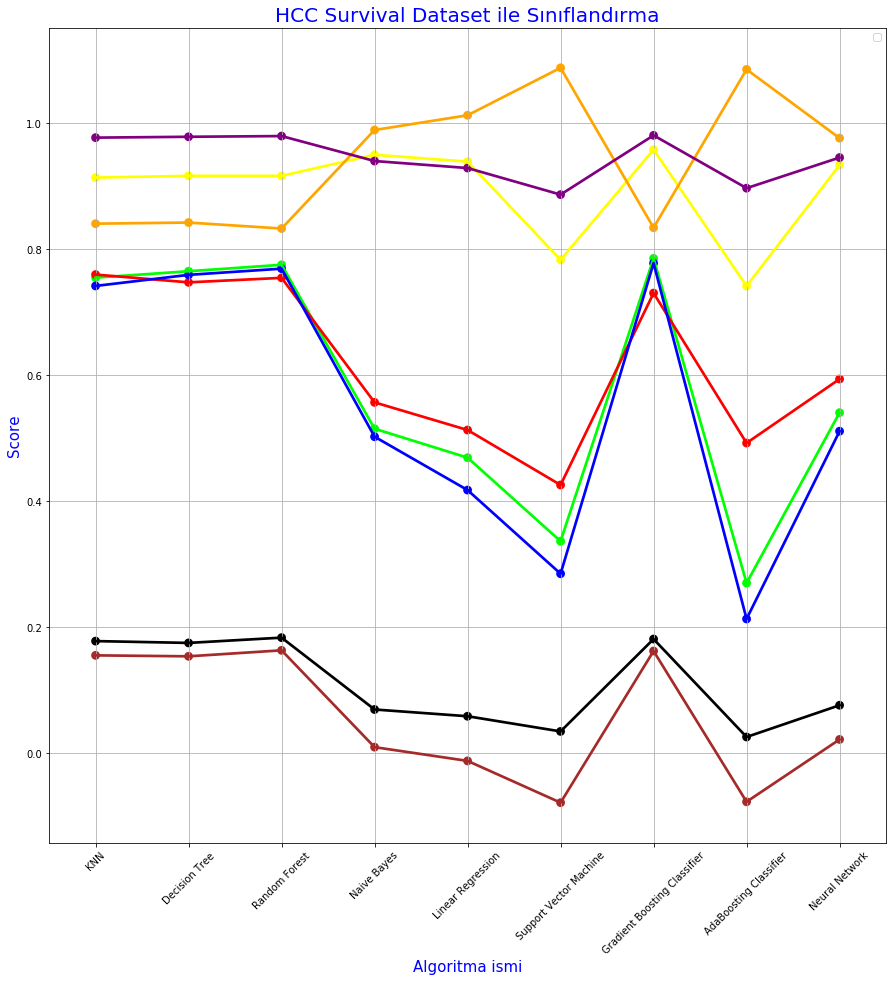

In [22]:
f,ax1 = plt.subplots(figsize =(15,15))
sns.pointplot(x=df['algo_list'], y=df['score_liste'],data=df,color='lime',alpha=0.8,label="score_liste")
sns.pointplot(x=df['algo_list'], y=df['precision'],data=df,color='red',alpha=0.8,label="precision")
sns.pointplot(x=df['algo_list'], y=df['recall'],data=df,color='black',alpha=0.8,label="recall")
sns.pointplot(x=df['algo_list'], y=df['f1_score'],data=df,color='blue',alpha=0.8,label="f1_score")
sns.pointplot(x=df['algo_list'], y=df['AUC'],data=df,color='yellow',alpha=0.8,label="AUC")

sns.pointplot(x=df['algo_list'], y=df['LR-'],data=df,color='orange',alpha=0.8,label="YOUDEN")

sns.pointplot(x=df['algo_list'], y=df['YOUDEN'],data=df,color='brown',alpha=0.8,label="LR-")
sns.pointplot(x=df['algo_list'], y=df['Specificity'],data=df,color='purple',alpha=0.8,label="Specificity")
plt.xlabel('Algoritma ismi',fontsize = 15,color='blue')
plt.ylabel('Score',fontsize = 15,color='blue')
plt.xticks(rotation= 45)
plt.title('HCC Survival Dataset ile Sınıflandırma',fontsize = 20,color='blue')
plt.grid()
plt.legend()
plt.show()

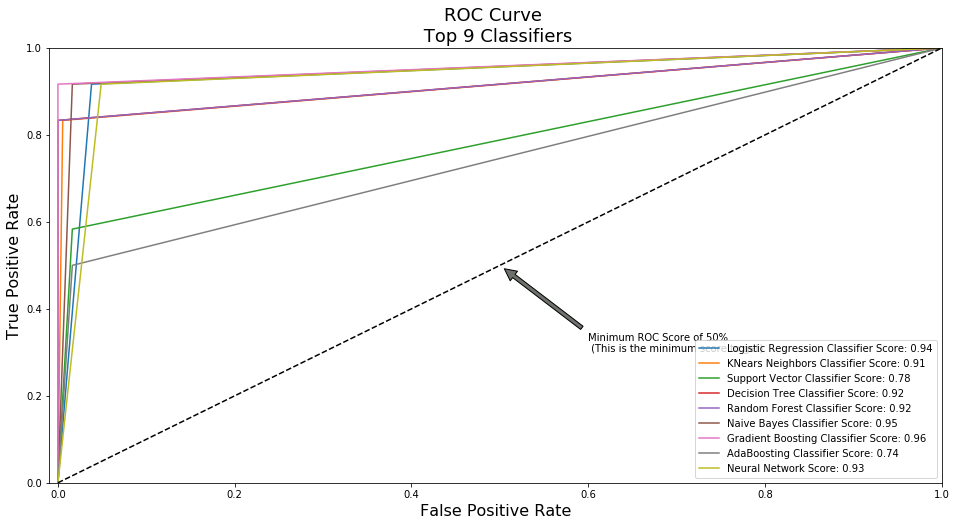

In [23]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gbc_fpr,gbc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 9 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: %0.2f'% lrcauc)
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: %0.2f'% knnauc)
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: %0.2f'% svcauc)
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: %0.2f'% dtcauc)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: %0.2f'% rfcauc)
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier Score: %0.2f'% nbauc)
    plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier Score: %0.2f'% gfcauc)
    plt.plot(abc_fpr, abc_tpr, label='AdaBoosting Classifier Score: %0.2f'% abcauc)
    plt.plot(ysa_fpr, ysa_tpr, label='Neural Network Score: %0.2f'% ysaauc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(lrc_fpr, lrc_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, dtc_fpr, dtc_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gfc_fpr,gfc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr)
plt.show()